In [34]:
!git clone <https://github.com/Manoj-vbm/Machine_learning.git>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git clone <https://github.com/Manoj-vbm/Machine_learning.git>'


# Hierarchical Clustering

Hierarchical clustering is a machine learning algorithm that groups similar objects into clusters by repeatedly merging the two most similar clusters until all of the clusters are merged into one.

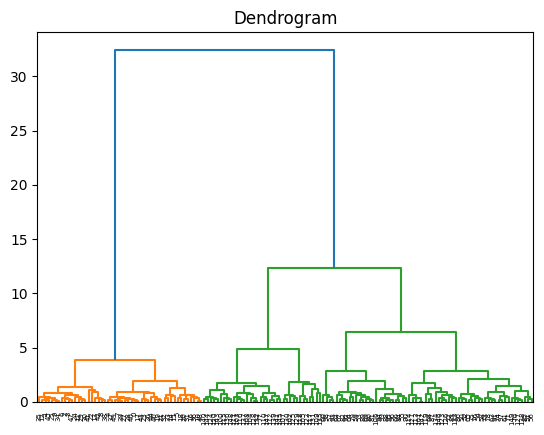

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering
n_clusters = 3  # Number of clusters to form
model = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = model.fit_predict(X)

# Plot the dendrogram (optional)
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.show()


# K-means clustering

K-means clustering is a machine learning algorithm that groups similar objects into k clusters by partitioning the data such that the sum of the squared distances between each object and its cluster centroid is minimized

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


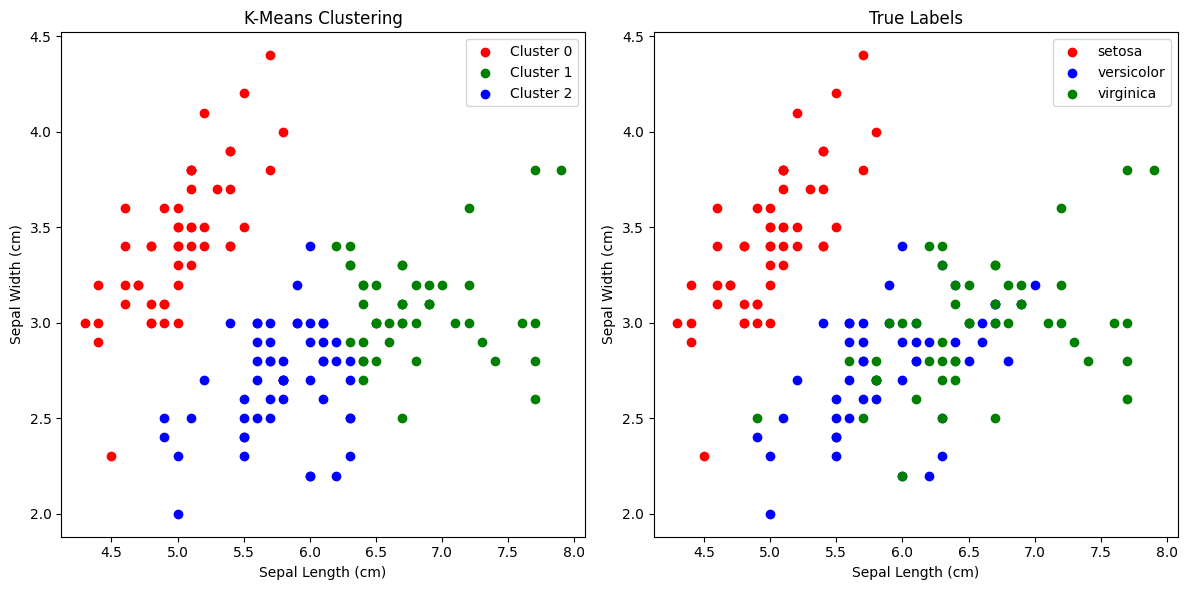

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()

# Select two features for visualization (sepal length and sepal width)
X = iris.data[:, [0, 1]]
y = iris.target

# Perform K-Means Clustering
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Create a scatter plot with K-Means clustering results
plt.figure(figsize=(12, 6))

# Plot K-Means Clustering Results
plt.subplot(121)
plt.scatter(X[kmeans_labels == 0, 0], X[kmeans_labels == 0, 1], c='r', marker='o', label='Cluster 0')
plt.scatter(X[kmeans_labels == 1, 0], X[kmeans_labels == 1, 1], c='g', marker='o', label='Cluster 1')
plt.scatter(X[kmeans_labels == 2, 0], X[kmeans_labels == 2, 1], c='b', marker='o', label='Cluster 2')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering')
plt.legend()

# Plot True Labels
plt.subplot(122)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='o', label=iris.target_names[0])
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', marker='o', label=iris.target_names[1])
plt.scatter(X[y == 2, 0], X[y == 2, 1], c='g', marker='o', label=iris.target_names[2])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('True Labels')
plt.legend()

plt.tight_layout()
plt.show()


# Principal component analysis (PCA)

Principal component analysis (PCA) is an unsupervised machine learning algorithm that transforms a set of correlated variables into a set of uncorrelated variables, called principal components. The principal components are ordered so that the first component accounts for the most variance in the data, the second component accounts for the second most variance, and so on

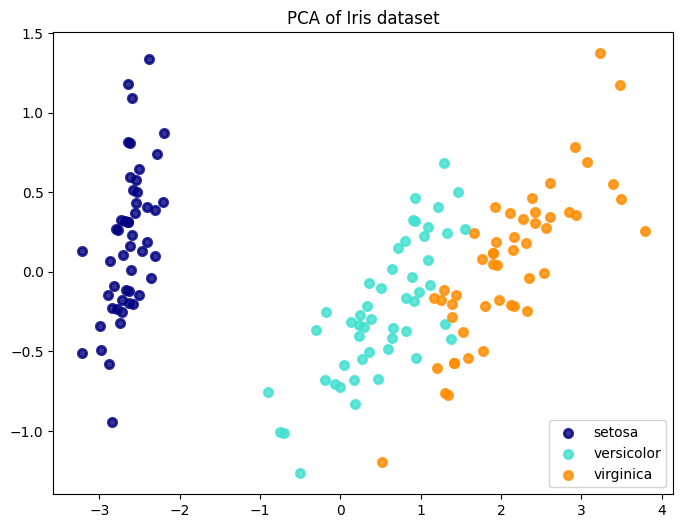

In [5]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA with two principal components
n_components = 3  # You can adjust this number to your needs
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Plot the data in the reduced PCA space
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Iris dataset')

plt.show()


In [10]:
import seaborn as sns

# Load the Palmer Penguins dataset
penguins = sns.load_dataset("penguins")

# View the complete dataset
print(penguins.head())
print(penguins.tail())



  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe             NaN            NaN                NaN   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8              212.0   
343  Gentoo  Biscoe            49.9     

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


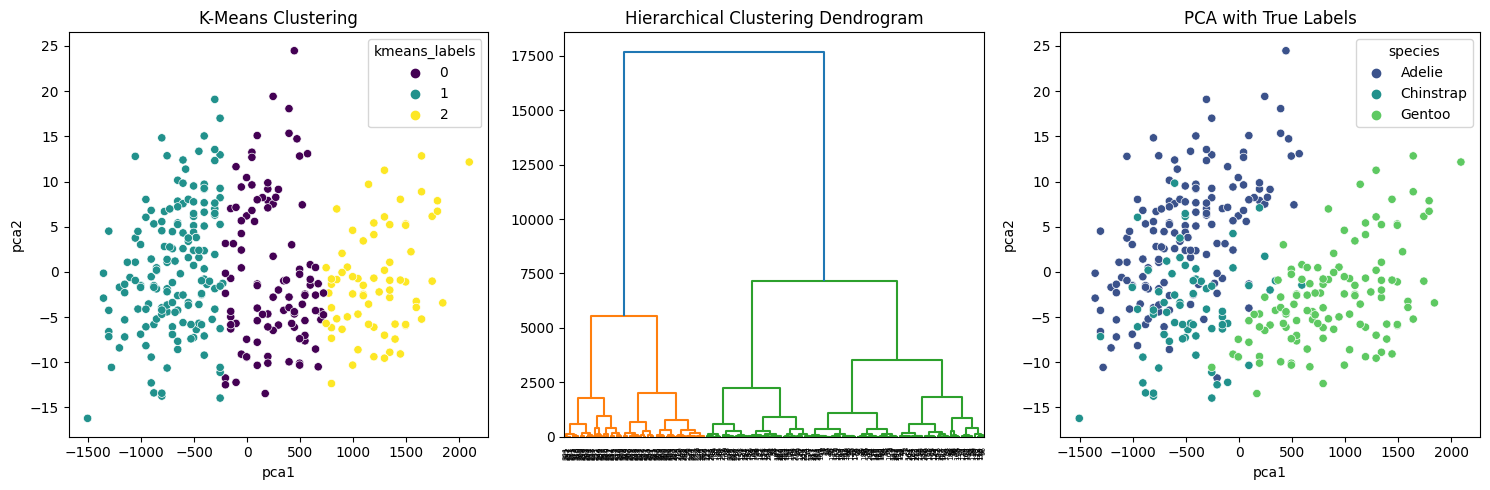

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

# Load the Palmer Penguins dataset
penguins = sns.load_dataset("penguins")

# Data preprocessing: handle missing values (drop rows with missing values for simplicity)
penguins = penguins.dropna()

# Select features for clustering
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]

# K-Means Clustering
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
penguins['kmeans_labels'] = kmeans.fit_predict(X)

# Hierarchical Clustering (Agglomerative Clustering)
linkage_matrix = linkage(X, method='ward')

# Set a threshold height for cutting the dendrogram
threshold = 1000 # Adjust this value as needed

# Get cluster labels by cutting the dendrogram
penguins['hierarchical_labels'] = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Principal Component Analysis (PCA)
n_components = 2  # Number of principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
penguins['pca1'] = X_pca[:, 0]
penguins['pca2'] = X_pca[:, 1]

# Plot results
plt.figure(figsize=(15, 5))

# K-Means Clustering Plot
plt.subplot(131)
sns.scatterplot(x='pca1', y='pca2', hue='kmeans_labels', data=penguins, palette='viridis')
plt.title('K-Means Clustering')

# Hierarchical Clustering Dendrogram
plt.subplot(132)
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')

# PCA Plot
plt.subplot(133)
sns.scatterplot(x='pca1', y='pca2', hue='species', data=penguins, palette='viridis')
plt.title('PCA with True Labels')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


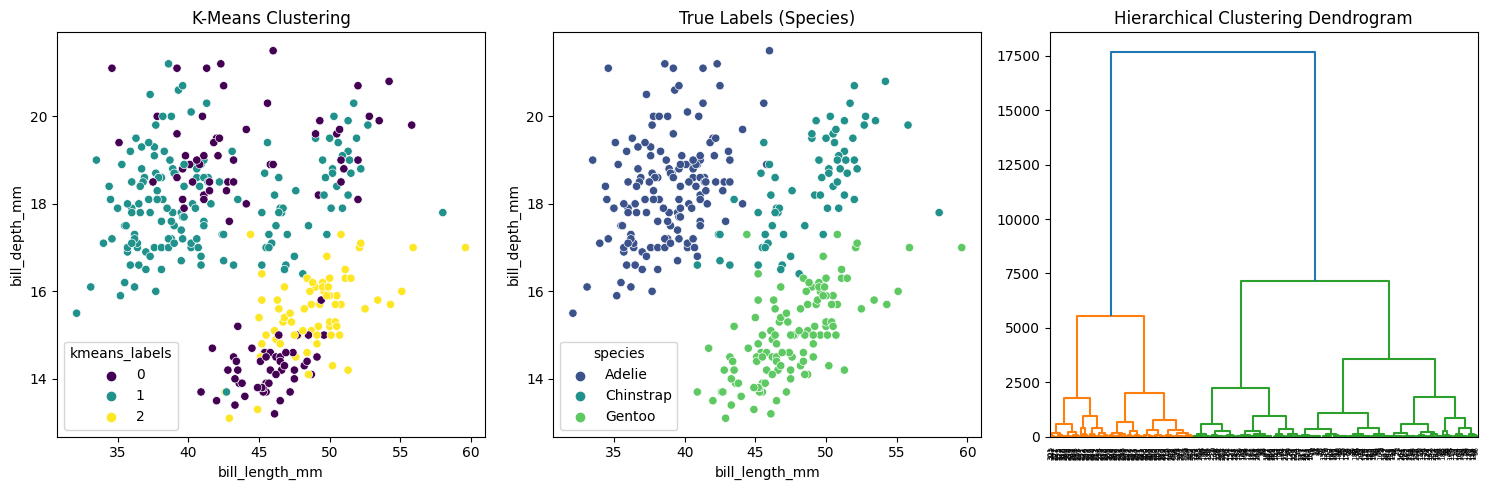

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the Palmer Penguins dataset
penguins = sns.load_dataset("penguins")

# Data preprocessing: handle missing values (drop rows with missing values for simplicity)
penguins = penguins.dropna()

# Select features for clustering
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]

# K-Means Clustering
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
penguins['kmeans_labels'] = kmeans.fit_predict(X)

# Hierarchical Clustering (Agglomerative Clustering)
linkage_matrix = linkage(X, method='ward')

# Set a threshold height for cutting the dendrogram to obtain three clusters
threshold = 80  # Adjust this value as needed

# Get cluster labels by cutting the dendrogram
penguins['hierarchical_labels'] = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Plot results
plt.figure(figsize=(15, 5))

# K-Means Clustering Plot
plt.subplot(131)
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='kmeans_labels', data=penguins, palette='viridis')
plt.title('K-Means Clustering')

# True Labels (species)
plt.subplot(132)
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins, palette='viridis')
plt.title('True Labels (Species)')

# Hierarchical Clustering Dendrogram
plt.subplot(133)
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')



plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


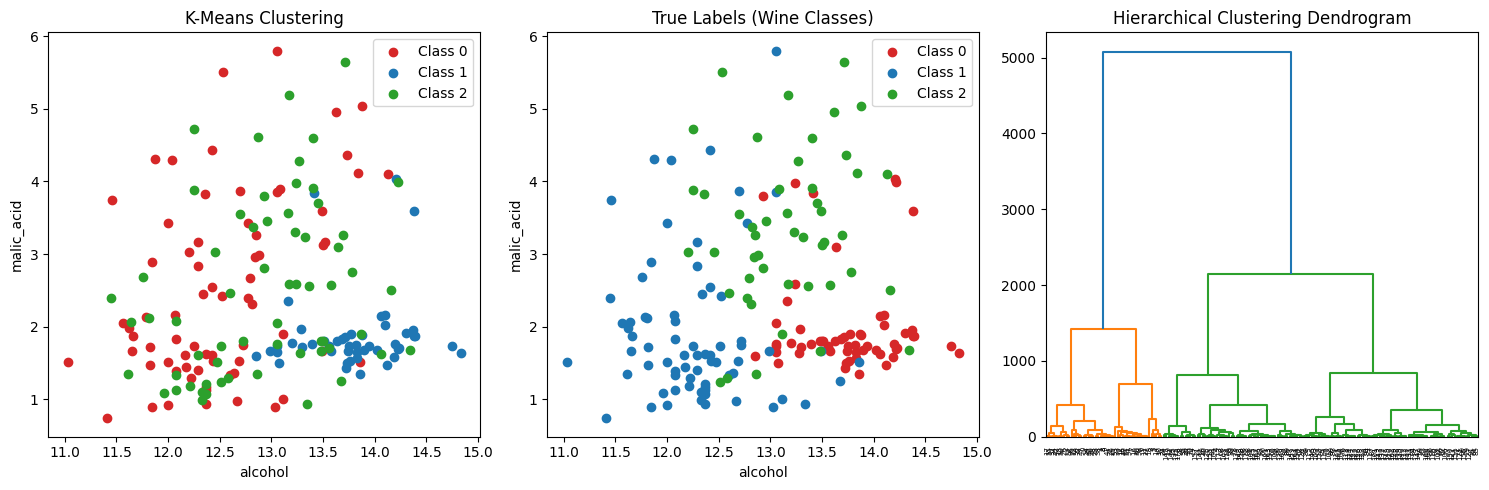

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_wine
from matplotlib.colors import ListedColormap

# Load the Wine Classification Dataset
wine = load_wine()
X = wine.data

# K-Means Clustering
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Hierarchical Clustering (Agglomerative Clustering)
linkage_matrix = linkage(X, method='ward')

# Set a threshold height for cutting the dendrogram to obtain three clusters
threshold = 100  # Adjust this value as needed

# Get cluster labels by cutting the dendrogram
hierarchical_labels = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Custom colormap for wine classes
wine_cmap = ListedColormap(['tab:red', 'tab:blue', 'tab:green'])

# Wine class names
class_names = ['Class 0', 'Class 1', 'Class 2']

# Plot results
plt.figure(figsize=(15, 5))

# K-Means Clustering Plot
plt.subplot(131)
for i, wine_class in enumerate(class_names):
    plt.scatter(X[kmeans_labels == i, 0], X[kmeans_labels == i, 1], c=[wine_cmap(i)], label=wine_class)

plt.title('K-Means Clustering')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend()

# True Labels (wine classes)
plt.subplot(132)
for i, wine_class in enumerate(class_names):
    plt.scatter(X[wine.target == i, 0], X[wine.target == i, 1], c=[wine_cmap(i)], label=wine_class)

plt.title('True Labels (Wine Classes)')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend()

# Hierarchical Clustering Dendrogram
plt.subplot(133)
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')

plt.tight_layout()
plt.show()
